<a href="https://colab.research.google.com/github/tj-ie/data_analytics/blob/main/cluster_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
# 住所データを読み込み
cluster_df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/data/address_data.json')

In [ ]:
# 不要なカラムを削除
del(cluster_df['address'])
del(cluster_df['distance_text'])
del(cluster_df['duration_text'])
cluster_df['distance_value'] = cluster_df['distance_value'] / 1000
cluster_df['duration_value'] = cluster_df['duration_value'] / 60

# データ整形
cluster_array = np.array([cluster_df['distance_value'].tolist(),
                          cluster_df['duration_value'].tolist()], np.int32)

cluster_array = cluster_array.T

# クラスタ分析（クラスタ数=4）
pred = KMeans(n_clusters=4).fit_predict(cluster_array)

# Pandasのデータフレームにクラスタ番号を追加
cluster_df['cluster_id'] = pred


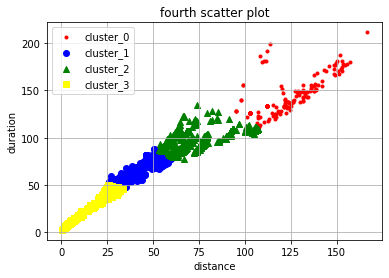

In [ ]:
# クラスタリング結果をプロット
df_0 = cluster_df[cluster_df['cluster_id'] == 0]
df_1 = cluster_df[cluster_df['cluster_id'] == 1]
df_2 = cluster_df[cluster_df['cluster_id'] == 2]
df_3 = cluster_df[cluster_df['cluster_id'] == 3]

x0 = [distance['distance_value'] for i, distance in df_0.iterrows()]
y0 = [distance['duration_value'] for i, distance in df_0.iterrows()]

x1 = [distance['distance_value'] for i, distance in df_1.iterrows()]
y1 = [distance['duration_value'] for i, distance in df_1.iterrows()]

x2 = [distance['distance_value'] for i, distance in df_2.iterrows()]
y2 = [distance['duration_value'] for i, distance in df_2.iterrows()]

x3 = [distance['distance_value'] for i, distance in df_3.iterrows()]
y3 = [distance['duration_value'] for i, distance in df_3.iterrows()]

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

ax.scatter(x0, y0, c='red', marker='.', label='cluster_0')
ax.scatter(x1, y1, c='blue', marker='o', label='cluster_1')
ax.scatter(x2, y2, c='green', marker='^', label='cluster_2')
ax.scatter(x3, y3, c='yellow', marker='s', label='cluster_3')

ax.set_title('fourth scatter plot')
ax.set_xlabel('distance')
ax.set_ylabel('duration')

ax.grid(True)

ax.legend(loc='upper left')
fig.show()